<a href="https://colab.research.google.com/github/ghoshal7/Supply_Chain_Analytics/blob/master/Supply_Chain_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare google colab

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Load data

In [0]:
downloaded = drive.CreateFile({'id':'15H9eeU6p7MzIqbz9aQGpQwp4D1bN8lPm'}) 
downloaded.GetContentFile('CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx') 

In [4]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sb

# Read data
data = pd.read_excel('CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx')
data.head()

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
0,E00000001,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,Y,2,NaN,NaN,2016-07-03 03:07:29,2016-07-03 04:09:49,2016-07-06 00:59:42,2016-07-08,2016-07-07,1612,38,3,PASS
1,E00000002,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,3,Y,NaN,2016-07-03 00:08:43,2016-07-03 02:16:24,2016-07-03 07:17:04,2016-07-06,2016-07-05,531,8,3,PASS
2,E00000003,FRANCE,Ground,1,ANTWERP,TOPS,Y,3,NaN,NaN,2016-07-03 00:36:00,2016-07-03 02:16:18,2016-07-03 06:16:57,2016-07-06,2016-07-05,504,8,3,PASS
3,E00000004,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,5,NaN,NaN,2016-07-03 00:47:45,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-07,2016-07-05,492,8,5,PASS
4,E00000005,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,Y,1,NaN,NaN,2016-07-03 03:52:13,2016-07-03 07:56:33,2016-07-05 08:53:19,2016-07-06,2016-07-06,1567,6,1,PASS


### See data and do initial cleanings

In [5]:
## 
print('size of data = ', np.shape(data))
print('shipping methods = ', data.shipping_method.nunique(), '-->', data.shipping_method.unique())
print('countries = ', data.country.nunique(), '-->', data.country.unique())
print('facility = ', data.facility.nunique(), '-->', data.facility.unique())
print('products = ', data.product_category.nunique(), '-->', data.product_category.unique())

print('*'*20)

print('rows with more than 1 orders = ', data[data.units_per_order != 1].shape[0])

print('To understand:', '\n', 'on_sale VALUES= ', data.on_sale.nunique(),'-->', data.on_sale.unique(), '\n', 
     'returned VALUES = ', data.returned.nunique(), '-->', 'returned = ', data[data.returned == 'Y'].shape[0],'\n',
     'backorder VALUES = ', data.backorder.nunique(), '-->', 'backorder = ', data[data.backorder == 'Y'].shape[0],'\n',
     'passed = ', data[data.delivered_to_plan == 'PASS'].shape[0],'\n',
     'failed = ', data[data.delivered_to_plan == 'FAIL'].shape[0],'\n')

size of data =  (110114, 19)
shipping methods =  4 --> ['Ground' 'Next Day' '3-Day' '2-Day']
countries =  6 --> ['UNITED KINGDOM' 'FRANCE' 'GERMANY' 'SWEDEN' 'BELGIUM' 'NETHERLANDS']
facility =  6 --> ['OXFORD' 'ANTWERP' 'MANCHESTER' 'AUGSBURG' 'HANOVER' 'EINDHOVEN']
products =  3 --> ['ACCESSORIES' 'JACKETS & VESTS' 'TOPS']
********************
rows with more than 1 orders =  2423
To understand: 
 on_sale VALUES=  2 --> ['Y' 'N'] 
 returned VALUES =  1 --> returned =  15391 
 backorder VALUES =  1 --> backorder =  12110 
 passed =  98523 
 failed =  11591 



In [6]:
print(data.returned.unique(), data.backorder.unique(), data.returned.unique(), data.delivered_to_plan.unique())

[nan 'Y'] [nan 'Y'] [nan 'Y'] ['PASS' 'FAIL']


***Hence, wee need to replace nan with 1 (for Yes), 0 (for No), and then check for missing values***

In [7]:
df = data.copy()
df.delivered_to_plan = np.where(df.delivered_to_plan == 'PASS', 1, 0)

for i in ['on_sale', 'returned', 'backorder']:
  print(i)
  df[i] = np.where(df[i]=='Y', 1, 0)

df.head(12)

on_sale
returned
backorder


,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
0,E00000001,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,1,2,0,0,2016-07-03 03:07:29,2016-07-03 04:09:49,2016-07-06 00:59:42,2016-07-08,2016-07-07,1612,38,3,1
1,E00000002,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,0,3,1,0,2016-07-03 00:08:43,2016-07-03 02:16:24,2016-07-03 07:17:04,2016-07-06,2016-07-05,531,8,3,1
2,E00000003,FRANCE,Ground,1,ANTWERP,TOPS,1,3,0,0,2016-07-03 00:36:00,2016-07-03 02:16:18,2016-07-03 06:16:57,2016-07-06,2016-07-05,504,8,3,1
3,E00000004,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,5,0,0,2016-07-03 00:47:45,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-07,2016-07-05,492,8,5,1
4,E00000005,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,1,1,0,0,2016-07-03 03:52:13,2016-07-03 07:56:33,2016-07-05 08:53:19,2016-07-06,2016-07-06,1567,6,1,1
5,E00000006,UNITED KINGDOM,Ground,1,MANCHESTER,JACKETS & VESTS,1,1,1,0,2016-07-03 04:15:07,2016-07-03 07:56:53,2016-07-04 19:04:46,2016-07-07,2016-07-05,1544,34,2,1
6,E00000007,UNITED KINGDOM,Ground,1,OXFORD,TOPS,0,2,1,0,2016-07-03 04:21:14,2016-07-05 16:44:24,2016-07-06 18:38:55,2016-07-08,2016-07-08,1538,25,5,1
7,E00000008,UNITED KINGDOM,Ground,1,OXFORD,JACKETS & VESTS,1,2,0,0,2016-07-03 04:28:20,2016-07-03 07:46:47,2016-07-05 13:38:41,2016-07-08,2016-07-06,1531,31,2,1
8,E00000009,FRANCE,Ground,1,ANTWERP,TOPS,1,4,0,0,2016-07-03 01:29:43,2016-07-03 03:17:01,2016-07-03 08:16:25,2016-07-06,2016-07-05,450,7,4,1
9,E00000010,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,3,0,0,2016-07-03 01:39:28,2016-07-03 04:16:31,2016-07-03 06:17:19,2016-07-06,2016-07-06,440,6,3,1


In [8]:
df.dtypes  ## date time format already done

order_id                          object
country                           object
shipping_method                   object
units_per_order                    int64
facility                          object
product_category                  object
on_sale                            int64
transit_days                       int64
returned                           int64
backorder                          int64
datetime_ordered          datetime64[ns]
datetime_sourced          datetime64[ns]
datetime_product_ready    datetime64[ns]
datetime_planned          datetime64[ns]
datetime_delivered        datetime64[ns]
deadline_source                    int64
deadline_make                      int64
deadline_deliver                   int64
delivered_to_plan                  int64
dtype: object

In [9]:
print(df.datetime_delivered[0] - df.datetime_delivered[1], '\n', 
      df.datetime_ordered[0] - df.datetime_ordered[1], '\n', 
      df.datetime_planned[0] - df.datetime_planned[1], '\n', 
      df.datetime_product_ready[0] - df.datetime_product_ready[1], '\n', 
      df.datetime_sourced[0] - df.datetime_sourced[1])

2 days 00:00:00 
 0 days 02:58:46 
 2 days 00:00:00 
 2 days 17:42:38 
 0 days 01:53:25


**GET the date & time and DO some analysis**

maximum difference b/w order and source =  
 33137   45 days 20:40:27
11894   37 days 02:59:10
1943    35 days 15:07:02
880     34 days 00:25:03
7904    32 days 00:59:23
dtype: timedelta64[ns]


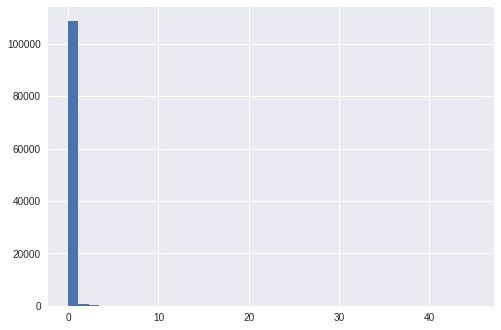

0     105455
1       3165
2        841
3        175
7         72
6         49
8         44
9         40
4         37
5         36
10        36
12        29
11        28
13        21
14        14
15        12
16        12
17        10
19        10
18         6
20         5
23         5
22         3
21         2
37         1
24         1
29         1
32         1
34         1
35         1
45         1
dtype: int64


In [10]:
print('maximum difference b/w order and source = ', '\n', (df.datetime_sourced - df.datetime_ordered).nlargest(5))

plt.hist((df.datetime_sourced - df.datetime_ordered).apply(lambda datestamp: datestamp.days), bins = 40); plt.show()
print((df.datetime_sourced - df.datetime_ordered).apply(lambda datestamp: datestamp.days).value_counts())

**Therefore, we can drop if the difference b/w order and source is more than 1 days, as 0 consists = 105455/ 110114 = 95 %**

In [0]:
df['date_order'] = df.datetime_ordered.apply(lambda datestamp: datestamp.date()) # date when order is planned
df['date_planned'] = df.datetime_planned.apply(lambda datestamp: datestamp.date()) # date of promise delivery
df['date_delivered'] = df.datetime_delivered.apply(lambda datestamp: datestamp.date()) # date when delivered
df['date_product_ready'] = df.datetime_product_ready.apply(lambda datestamp: datestamp.date()) # date when ready

df['time_order'] = df.datetime_ordered.apply(lambda datestamp: datestamp.time()) # time when order is planned
df['time_planned'] = df.datetime_planned.apply(lambda datestamp: datestamp.time()) # time of promise delivery
df['time_delivered'] = df.datetime_delivered.apply(lambda datestamp: datestamp.time()) # time when delivered
df['time_product_ready'] = df.datetime_product_ready.apply(lambda datestamp: datestamp.time()) # time when ready

df['source-order(in_days)']= (df.datetime_sourced - df.datetime_ordered).apply(lambda datestamp: datestamp.days)

In [12]:
df[df.delivered_to_plan == 0].head()

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,returned,backorder,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,datetime_delivered,deadline_source,deadline_make,deadline_deliver,delivered_to_plan,date_order,date_planned,date_delivered,date_product_ready,time_order,time_planned,time_delivered,time_product_ready,source-order(in_days)
42,E00000043,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,1,3,0,0,2016-07-03 07:33:24,2016-07-03 09:17:23,2016-07-04 04:16:47,2016-07-05,2016-07-06,86,25,3,0,2016-07-03,2016-07-05,2016-07-06,2016-07-04,07:33:24,00:00:00,00:00:00,04:16:47,0
44,E00000045,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,0,4,0,0,2016-07-03 07:55:02,2016-07-03 10:16:45,2016-07-04 05:17:01,2016-07-06,2016-07-07,64,24,4,0,2016-07-03,2016-07-06,2016-07-07,2016-07-04,07:55:02,00:00:00,00:00:00,05:17:01,0
50,E00000051,GERMANY,3-Day,1,AUGSBURG,JACKETS & VESTS,1,3,0,0,2016-07-03 10:27:50,2016-07-04 04:42:13,2016-07-05 03:42:40,2016-07-08,2016-07-09,3812,70,4,0,2016-07-03,2016-07-08,2016-07-09,2016-07-05,10:27:50,00:00:00,00:00:00,03:42:40,0
56,E00000057,GERMANY,Ground,1,AUGSBURG,JACKETS & VESTS,1,2,0,0,2016-07-03 11:10:54,2016-07-04 03:32:31,2016-07-05 03:42:47,2016-07-07,2016-07-08,3769,71,3,0,2016-07-03,2016-07-07,2016-07-08,2016-07-05,11:10:54,00:00:00,00:00:00,03:42:47,0
57,E00000058,GERMANY,3-Day,1,AUGSBURG,JACKETS & VESTS,0,3,1,0,2016-07-03 11:40:02,2016-07-04 03:32:32,2016-07-05 03:42:54,2016-07-08,2016-07-13,3739,71,4,0,2016-07-03,2016-07-08,2016-07-13,2016-07-05,11:40:02,00:00:00,00:00:00,03:42:54,0


### Feature Engineering - remove NA and outliers

In [13]:
print(np.sum(df.isnull()))

order_id                  0
country                   0
shipping_method           0
units_per_order           0
facility                  0
product_category          0
on_sale                   0
transit_days              0
returned                  0
backorder                 0
datetime_ordered          0
datetime_sourced          0
datetime_product_ready    0
datetime_planned          0
datetime_delivered        0
deadline_source           0
deadline_make             0
deadline_deliver          0
delivered_to_plan         0
date_order                0
date_planned              0
date_delivered            0
date_product_ready        0
time_order                0
time_planned              0
time_delivered            0
time_product_ready        0
source-order(in_days)     0
dtype: int64


***WOW! No missing values. Let's check potential outliers, if any***

In [14]:
df.describe() # only numeric columns

,units_per_order,on_sale,transit_days,returned,backorder,deadline_source,deadline_make,deadline_deliver,delivered_to_plan,source-order(in_days)
count,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000,110114.000000
mean,1.042329,0.515311,2.381305,0.139773,0.109977,1336.617297,40.581806,3.515829,0.894736,0.091669
std,0.496093,0.499768,1.113712,0.346753,0.312862,1105.341513,25.320339,1.741056,0.306894,0.779382
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,479.000000,23.000000,2.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,0.000000,1104.000000,32.000000,3.000000,1.000000,0.000000
75%,1.000000,1.000000,3.000000,0.000000,0.000000,1566.000000,52.000000,5.000000,1.000000,0.000000
max,50.000000,1.000000,8.000000,1.000000,1.000000,6392.000000,168.000000,14.000000,1.000000,45.000000


In [15]:
## only units_per_order looks problematic, let's dig deeper

## clearly most orders has only 1 unit
print('1 unit per order accounts = ', (df[df.units_per_order == 1].shape[0]/df.shape[0])*100, 'percents') 

print(df.units_per_order.value_counts())

1 unit per order accounts =  97.79955319033003 percents
1     107691
2       1638
3        409
4        112
5        100
6         59
10        51
7         16
8         10
9          8
20         8
30         2
35         2
50         2
16         1
12         1
11         1
40         1
17         1
19         1
Name: units_per_order, dtype: int64


## Let's keep rows with same source date & order date and units per order = 1

Text(0.5, 1.0, 'TOPS demands')

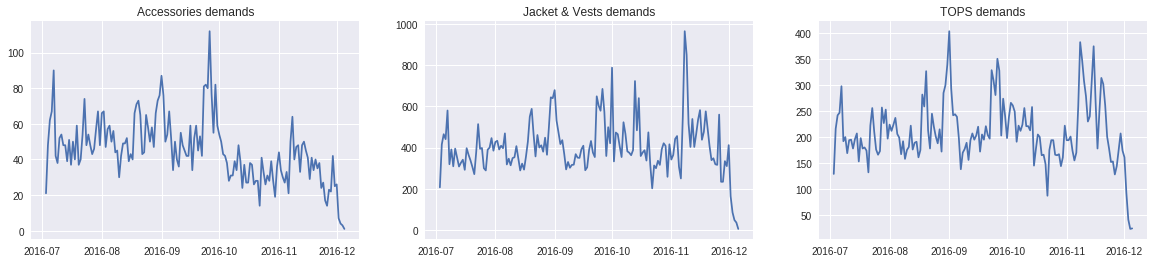

In [19]:
## let's drop them for now!
df1 = df[(df.units_per_order == 1) & (df['source-order(in_days)'] == 0)]


## Explore the demand - product wise
accessories = df1[df1.product_category=='ACCESSORIES'].groupby(df1.date_order).sum()
jackets = df1[df1.product_category=='JACKETS & VESTS'].groupby(df1.date_order).sum()
tops = df1[df1.product_category=='TOPS'].groupby(df1.date_order).sum()

f,(a,b,c) = plt.subplots(1,3, figsize = (20,4))
a.plot(accessories['units_per_order']); a.set_title('Accessories demands')
b.plot(jackets['units_per_order']); b.set_title('Jacket & Vests demands')
c.plot(tops['units_per_order']); c.set_title('TOPS demands')

**********  PASS  **********


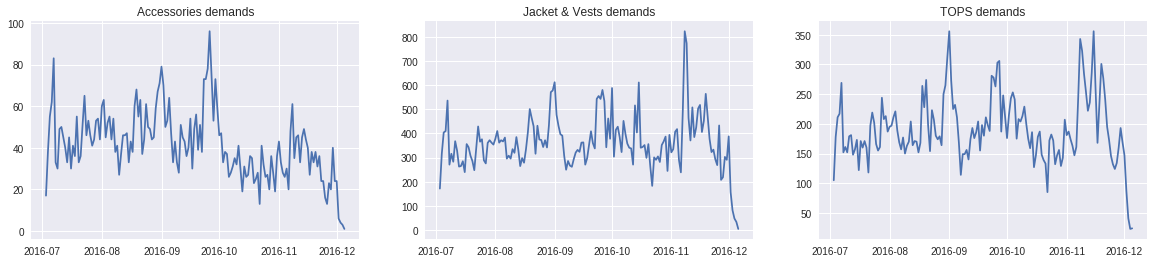

**********  FAIL  **********


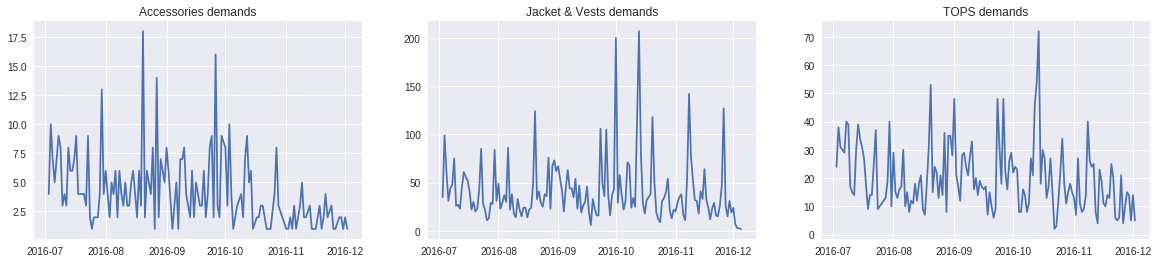

**********  locations  **********
BELGIUM  =  22.483940042826553
FRANCE  =  10.437538335718667
GERMANY  =  10.568265936752224
NETHERLANDS  =  10.368663594470046
SWEDEN  =  8.75106202209006
UNITED KINGDOM  =  7.746478873239436
**********  products  **********


product_category
ACCESSORIES        0.083511
JACKETS & VESTS    0.100291
TOPS               0.093249
Name: units_per_order, dtype: float64

In [25]:
## Explore the dataset
df3 = df[(df.units_per_order == 1) & (df['source-order(in_days)'] == 0)]

df1 = df3[df3.delivered_to_plan==1]
df2 = df3[df3.delivered_to_plan==0]
## Explore the demand - product wise

# Pass
accessories1 = df1[df1.product_category=='ACCESSORIES'].groupby(df1.date_order).sum()
jackets1 = df1[df1.product_category=='JACKETS & VESTS'].groupby(df1.date_order).sum()
tops1 = df1[df1.product_category=='TOPS'].groupby(df1.date_order).sum()

print('*'*10, ' PASS ', '*'*10)
f1,(a1,b1,c1) = plt.subplots(1,3, figsize = (20,4))
a1.plot(accessories1['units_per_order']); a1.set_title('Accessories demands')
b1.plot(jackets1['units_per_order']); b1.set_title('Jacket & Vests demands')
c1.plot(tops1['units_per_order']); c1.set_title('TOPS demands')
plt.show()

# Fail
accessories2 = df2[df2.product_category=='ACCESSORIES'].groupby(df2.date_order).sum()
jackets2 = df2[df2.product_category=='JACKETS & VESTS'].groupby(df2.date_order).sum()
tops2 = df2[df2.product_category=='TOPS'].groupby(df2.date_order).sum()

print('*'*10, ' FAIL ', '*'*10)
f2,(a2,b2,c2) = plt.subplots(1,3, figsize = (20,4))
a2.plot(accessories2['units_per_order']); a2.set_title('Accessories demands')
b2.plot(jackets2['units_per_order']); b2.set_title('Jacket & Vests demands')
c2.plot(tops2['units_per_order']); c2.set_title('TOPS demands')
plt.show()


## Explore locations
print('*'*10, ' locations ', '*'*10)
failed_order_counts = df2.groupby('country').sum()['units_per_order']
total_order_counts = df3.groupby('country').sum()['units_per_order']
# pd.DataFrame([failed_order_counts, total_order_counts], columns=['Failed', 'Total'])
#print(failed_order_counts, total_order_counts)

countries = ['BELGIUM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'SWEDEN', 'UNITED KINGDOM']
for i,j,k in zip(failed_order_counts, total_order_counts, countries):
  print (k, ' = ', (i/j)*100)
  
## Explore product categories
print('*'*10, ' products ', '*'*10)
df3[df3.delivered_to_plan==0].groupby('product_category').sum()['units_per_order']/df3.groupby('product_category').sum()['units_per_order']
